## Import library

In [1]:
import seaborn as sns

import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ta 
import plotly.graph_objects as go
import stock_lib as stlib

## Import data

In [2]:
data = yf.download("TSLA", period='60d', interval='5m')
data = data.reset_index()

macd = ta.trend.MACD(close=data['Close'])
bb = ta.volatility.BollingerBands(close=data['Close'])
cmf = ta.volume.ChaikinMoneyFlowIndicator(high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume'])
rsi = ta.momentum.RSIIndicator(close=data['Close'])

data['rsi'] = rsi.rsi()
data['macd'] = macd.macd_diff()
data['cmf'] = cmf.chaikin_money_flow()
data['bb_width'] = bb.bollinger_wband()

data['rsi_5'] = data['rsi'].diff(periods=5)
data['macd_5'] = data['macd'].diff(periods=5)
data['cmf_5'] = data['cmf'].diff(periods=5)

data['close_5'] = data['Close'].diff(periods=-5)
data['close_5'] = (data['close_5'] / data['Close']) * 100

data['close_10'] = data['Close'].diff(periods=10)
data['close_10'] = (data['close_10'] / (data['Close'] - data['close_10'])) * 100

data = data.dropna()
# data1 = data[['rsi', 'rsi_diff', 'close_5', 'close_10', 'macd', 'cmf', 'bb_width']]
data1 = data[['rsi', 'close_5', 'macd', 'cmf', 'bb_width', 'rsi_5', 'macd_5', 'cmf_5']]

[*********************100%***********************]  1 of 1 completed


In [23]:
# data2 = data1[data1['close_5'] > 0]
data2 = data1
data2 = data2.reset_index()
data2 = data2.drop('index', axis=1)
data2


,rsi,close_5,macd,cmf,bb_width,rsi_5,macd_5,cmf_5
0,62.742183,0.875896,-0.609970,0.153149,1.194459,-10.046983,-0.432561,-0.068079
1,52.648311,0.279289,-0.804401,0.097686,1.106788,-17.104757,-0.588885,-0.099576
2,50.481847,0.662628,-0.966926,0.093244,0.962297,-19.229276,-0.700873,-0.092895
3,46.665047,0.224098,-1.142445,0.031773,1.058561,-17.191707,-0.735353,-0.137082
4,52.898755,0.491244,-1.063818,0.024917,1.054786,-3.617203,-0.429522,-0.139478
...,...,...,...,...,...,...,...,...
4630,55.983470,-0.536139,0.443561,-0.012548,0.838918,20.140526,0.757065,0.151027
4631,60.839802,-0.466489,0.538903,0.076038,0.890417,15.279798,0.699495,0.200079
4632,62.923726,-0.099694,0.613925,0.158915,0.977658,13.966279,0.623944,0.239391
4633,53.437097,-0.529515,0.510053,0.129114,0.998227,-8.231372,0.228220,0.106410


In [4]:
label = []

for i in range(0, len(data2)):
    
    if data2['close_5'][i] < -3:
        label.append(0)
    elif data2['close_5'][i] < -2:
        label.append(1)
    elif data2['close_5'][i] < -0.5:
        label.append(2)
    elif data2['close_5'][i] < 0.5:
        label.append(3)
    elif data2['close_5'][i] < 2:
        label.append(4)
    else:
        label.append(5)
        
data2['label'] = label

## Create Model

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

clf2 = RandomForestRegressor(random_state=0)

X = data2.drop(['close_5', 'label'], axis=1).to_numpy()
y = data2[['close_5']].to_numpy()

X = np.array(X)
y = np.array(y).ravel()

print(X.shape)
print(y.shape)

(4635, 7)
(4635,)


## Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

clf2.fit(X_train, y_train)

print(clf2.score(X, y))

0.8432313435477091


In [7]:
prediction = clf2.predict(X_test)

print("prediction:   ", prediction)
print()
print("actual value: ", y_test)
print()
diff = prediction - y_test
print("different:    ", np.absolute(diff))
print()

prediction:    [ 0.07162111 -0.1709513  -0.05101588  0.09016608 -0.00515551 -0.04796695
 -0.07068227  0.20771035  0.0847314   0.08565034 -0.07932317  0.00268487
  0.08456023  0.01185266  0.00792236 -0.01608817 -0.02273189  0.025781
 -0.14467828 -0.16469023 -0.13854727 -0.13266632 -0.08630075 -0.12543855
  0.11160117  0.20172947  0.24410343 -0.06965466  0.18793446  0.12582807
 -0.11607966 -0.06954697  0.01030422 -0.09306344 -0.18174638  0.00730423
  0.28055213  0.19667388 -0.03004522  0.28586365 -0.38325231 -0.03415692
 -0.10675195 -0.03381191 -0.06713398 -0.08057495 -0.1909609  -0.19501288
 -0.04907658  0.07490316  0.02200293  0.07555076 -0.0246757  -0.09937317
 -0.03133865 -0.01573201  0.07712523 -0.13686699  0.14289682 -0.18399842
  0.06354763 -0.0559035  -1.11003944  0.1422276  -0.0644813   0.17632565
  0.04818948 -0.00466875  0.14570409 -0.59203252 -0.03969109  0.06065716
 -0.03973384  0.06654853  0.28754293 -0.0103479  -0.01051632 -0.14002507
 -0.05815958 -0.28983578 -1.06174911 -

In [8]:
metrics.r2_score(y_test, prediction)

0.19166131746894255

## Classification

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=0)

X = data2.drop(['close_5', 'label'], axis=1).to_numpy()
y = data2[['label']].to_numpy()

X = np.array(X)
y = np.array(y).ravel()

print(X.shape)
print(y.shape)

(4635, 7)
(4635,)


In [10]:
scores = cross_val_score(clf1, X, y, cv=10)

In [11]:
scores

array([0.77586207, 0.79094828, 0.78663793, 0.74353448, 0.76077586,
       0.74946004, 0.76241901, 0.78617711, 0.76025918, 0.79049676])

In [12]:
data2

,rsi,close_5,macd,cmf,bb_width,rsi_5,macd_5,cmf_5,label
0,62.742183,0.875896,-0.609970,0.153149,1.194459,-10.046983,-0.432561,-0.068079,4
1,52.648311,0.279289,-0.804401,0.097686,1.106788,-17.104757,-0.588885,-0.099576,3
2,50.481847,0.662628,-0.966926,0.093244,0.962297,-19.229276,-0.700873,-0.092895,4
3,46.665047,0.224098,-1.142445,0.031773,1.058561,-17.191707,-0.735353,-0.137082,3
4,52.898755,0.491244,-1.063818,0.024917,1.054786,-3.617203,-0.429522,-0.139478,3
...,...,...,...,...,...,...,...,...,...
4630,55.983470,-0.536139,0.443561,-0.012548,0.838918,20.140526,0.757065,0.151027,2
4631,60.839802,-0.466489,0.538903,0.076038,0.890417,15.279798,0.699495,0.200079,3
4632,62.923726,-0.099694,0.613925,0.158915,0.977658,13.966279,0.623944,0.239391,3
4633,53.437097,-0.529515,0.510053,0.129114,0.998227,-8.231372,0.228220,0.106410,2


In [13]:
data2[data2['close_5'] < -3]

,rsi,close_5,macd,cmf,bb_width,rsi_5,macd_5,cmf_5,label
426,43.880447,-3.230439,0.132230,-0.002346,0.766132,-16.417724,-0.326151,-0.068184,0
817,55.668751,-3.223093,0.134577,-0.081336,0.473221,-2.611966,0.120472,-0.111630,0
1985,41.875437,-3.650952,0.085149,-0.170401,1.114909,3.742544,0.256182,0.022110,0
1986,41.566360,-4.023832,0.095949,-0.135346,1.068576,-1.643278,0.150753,0.023283,0
1987,41.480431,-4.042998,0.110426,-0.183870,0.908864,2.888006,0.194053,-0.012276,0
1988,49.214508,-4.224920,0.258933,-0.070823,0.786686,4.512947,0.226064,0.080382,0
1989,55.133023,-4.228043,0.473500,0.056529,0.747598,12.292635,0.400691,0.176278,0
3934,72.574639,-3.211924,0.474008,0.334933,0.751831,13.365443,0.222089,0.156449,0
3935,67.712253,-3.177749,0.445674,0.220085,0.808445,11.558295,0.195060,0.062372,0
3936,69.837292,-3.075351,0.428892,0.251710,0.867491,7.807669,0.140347,-0.016120,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
prediction = clf1.predict(X_test)

print("prediction:   ", prediction)
print()
print("actual value: ", y_test)
print()

prediction:    [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3
 3 4 3 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

actual value:  [3 2 3 3 2 3 3 3 3 3 4 3 2 

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, prediction)

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   3,   0,   0],
       [  0,   0,   2,  43,   1,   0],
       [  0,   0,   1, 363,   3,   0],
       [  0,   0,   1,  36,   7,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

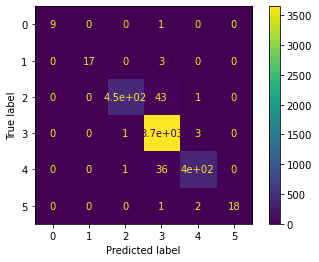

In [22]:
plot_confusion_matrix(clf1, X, y)  
plt.show() 